# CODE TD1 exo 1 sur la TFD (Octave)
----


Là tout est simple car tout est discret et N périodique :

- $t= k T_e$  avec N points
- $f=k\Delta_f$ avec N points dans $[0, F_e [$ ouvert à droite !!!

Faisons un essais avec un TFD à 4 points. On peut utiliser l'algo FFT de calcul rapide de TFD d'octave/matlab...

t =

    0.000000    0.010000    0.020000    0.030000

f =

    0   25   50   75



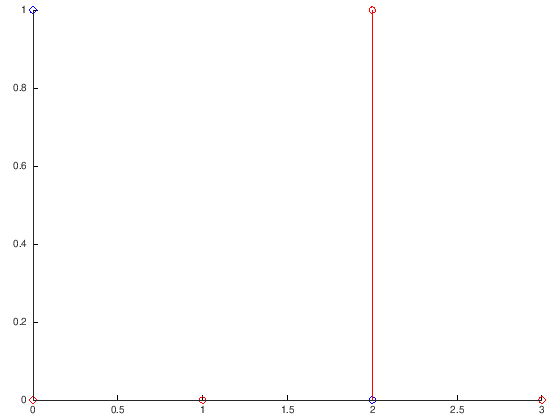

In [7]:
clear all;
close all;

N=4;
Fe=100; Te = 1/Fe;
%% VOTRE CODE : k= ? et t= ?
% déclarant un vecteur ligne k du segment entier [[0, 4[[ 
% le vecteur temps correspondant

k=(1:N)-1;   %astuce pour faire un vecteur de 0 à ?? avec N points...
t=k*Te 


%% VOTRE CODE : n= ? et f= Df=?
% déclarant un vecteur ligne n du segment entier [[0, 4[[ 
% le vecteur des 4 fréquences de [0 ; Fe[ <- semi ouvert ! 
% fréquences espacées de Df (la résolution fréquencielle ou le F0 des SdF)
Df=Fe/N ; n=k; f = n*Df

%% VOTRE CODE : delta = @(?) ?
% qui crée une fonction anonyme delta(k) qui vaut (k==0) 
delta = @(k) k==0 ; % impulsion unité discrète (astuce vaut 1 quand vrai)

l=2;
%% VOTRE CODE : x0 = ?; xl = ?
% qui utilise la fonction delta pour calculer x0 = delta(k)
% et xl = delta(k) retardée de l
x0 = delta(k);
xl = delta(k-l);

%% VOTRE CODE : stem (?,?,'r')
% qui affiche x0 et xl avec "stem" et "hold on" 
stem(k, x0,'b'); hold on;
stem(k, xl, 'r')

In [2]:
%%python 
from numpy import *
from matplotlib.pyplot import *
N=4
Fe=100
Te = 1./Fe 
k=arange(N)
t=k*Te 

Df=Fe/N 
n=k
f = n*Df

# on crée les signaux comme avant
delta = lambda k :  k==0  # impulsion unité discrète (astuce vaut 1 quand vrai)
x1 = delta(k)
l=2
xl = delta(k-l)
plot(t,x1,"o--")
show()

On peut créer une matrice avec en rangées tous les vecteurs de la base fréquencielle $w_0$ à $w_{N-1}$ et en colonne le temps pour $k$ de 0 à $N-1$ avec une bouclette *for*.

On peut même afficher toutes ces ondes d'analyse d'un coup avec une couleur par fréquence :

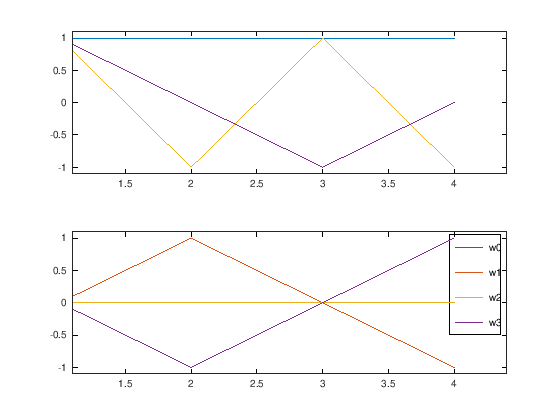

In [3]:
W_N=exp(i*2*pi/N); % Racine de l'unité
for indice_n=1:length(n)
    wn(indice_n,:)=exp(i*2*pi/N*n(indice_n)*k);
end
% wn = [ wo en ligne ]
%      [ w1 en ligne ]
%      [ w2 en ligne ]
%      [ w3 en ligne ]
       
subplot(211)
plot(real(wn))
axis(axis*1.1)
subplot(212)
plot(imag(wn))
legend(["w0";"w1";"w2";"w3"])
axis(axis*1.1)

Mais si on veut calculer touts les produits scalaires $<s,w_i>=<\overline{w_i},\overline{s}>$, il suffit de multiplier le conjugué de cette matrice de signaux avec le vecteur du signal s (vertical) à décomposer.

Ce qui donne:

In [4]:
conj(wn)*x1'
conj(wn)*xl'

ans =

   1
   1
   1
   1

ans =

   1.0000 + 0.0000i
  -1.0000 - 0.0000i
   1.0000 + 0.0000i
  -1.0000 - 0.0000i



On peut aussi calculer la matrice directement avec $M=(\overline{W_N^{nk}})_{0<n,k<N-1}$, et vérifier que la matrice est bien orthogonale (dans $\mathbb{C}$) donc
$$ M. M^H = N . Id$$ mais pas normée.

Où $M^H$ est la matrice adjointe : transposée du conjugué.
Et donc $M^{-1}=M^H/N$ 

Donc on peut calculer une tranformée inverse avec $M^H/N$.

In [5]:
% Matrice de passage (conj(W_N^{nk}) 
%      avec k(temps) en colonnes et 
%      n(freq) en rangées
M = (conj(W_N).^k).^(n') ;
% k vecteur à plat 0 1 2 3
% n' vecteur vertical 
%   .^   veut dire "mettre chaque élément à la puissance ..."
arrondir = @(v) round(v*1000)/1000;
arrondir(M)
arrondir(M*M')

% k vecteur à plat n' vecteur vertical
x1Bc=x1' ;% signal dans la base Bc en vecteur vertical
fftx1_matriciel = M*x1'
fftx1_matlab = fft(x1)' 

xlBc=xl' % signal dans la base Bc en vecteur vertical
fftxl= M*xlBc



ans =

   1 + 0i   1 - 0i   1 - 0i   1 + 0i
   1 + 0i   0 - 1i  -1 - 0i  -0 + 1i
   1 + 0i  -1 - 0i   1 + 0i  -1 - 0i
   1 + 0i  -0 + 1i  -1 - 0i   0 - 1i

ans =

   4  -0   0   0
  -0   4  -0  -0
   0  -0   4  -0
   0  -0  -0   4

fftx1_matriciel =

   1
   1
   1
   1

fftx1_matlab =

   1
   1
   1
   1

xlBc =

  0
  0
  1
  0

fftxl =

   1.0000 + 0.0000i
  -1.0000 - 0.0000i
   1.0000 + 0.0000i
  -1.0000 - 0.0000i

